<a href="https://colab.research.google.com/github/singhadarsh9191/AirBnB-Dataset/blob/main/AirBnB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART-1 (Data Cleaning and Manipulation)

We will begin by importing the required modules and reading the data file.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/airbnb_final (1) - airbnb_final (1).csv")

In [ ]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484.0,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647.0,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


### 1.1. **What is the shape of the dataset?**

In [ ]:
#Code goes here
df.shape

(7608, 15)

### 1.2 **Identify the data types of each column. Are there any columns that need type conversion?**

In [ ]:
# 1.2.1 Code to identify data types goes here.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   host_id           7602 non-null   float64
 1   neighbourhood     7608 non-null   object 
 2   latitude          7604 non-null   float64
 3   longitude         7602 non-null   float64
 4   room_type         7608 non-null   object 
 5   price in $        7598 non-null   float64
 6   minimum_nights    7599 non-null   float64
 7   availability_365  7607 non-null   float64
 8   Apartment_type    7607 non-null   object 
 9   City              7607 non-null   object 
 10  Rating            6030 non-null   float64
 11  No_of_bed_rooms   7324 non-null   float64
 12  No_of_beds        7591 non-null   float64
 13  No_of_bathrooms   6804 non-null   float64
 14  Bathroom_type     7607 non-null   object 
dtypes: float64(10), object(5)
memory usage: 891.7+ KB


In [ ]:
# 1.2.3 change the host_id column to an integer
df['host_id'] = df['host_id'].fillna(0).astype(int)
df['host_id'] = df['host_id'].astype(int)

### 1.3. **Are there any duplicate rows in the dataset? If yes, how would you handle them?**

In [ ]:
# 1.3.1 check for duplicate value
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [host_id, neighbourhood, latitude, longitude, room_type, price in $, minimum_nights, availability_365, Apartment_type, City, Rating, No_of_bed_rooms, No_of_beds, No_of_bathrooms, Bathroom_type]
Index: []


### 1.4. **Check for missing values, How would you handle the missing values in the dataset?**

In [ ]:
# 1.4.1 check for missing values
df.isnull().sum()

host_id                0
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $            10
minimum_nights         9
availability_365       1
Apartment_type         1
City                   1
Rating              1578
No_of_bed_rooms      284
No_of_beds            17
No_of_bathrooms      804
Bathroom_type          1
dtype: int64

In [ ]:
# 1.4.3 Populate missing values in the 'price in $' column with the mean.
mean_values = df['price in $'].mean()
df['price in $'] = df['price in $'].fillna(mean_values)

In [ ]:
# 1.4.4 Verify that there are no more missing values in the 'price in $' column
df['price in $'].isnull().sum()

0

In [ ]:
# 1.4.5 Populate all missing values in the City column with "Amsterdam"
df['City'] = df['City'].fillna("Amsterdam")


In [ ]:
# 1.4.6 Verify that there are no more missing values in the 'City' column
df['City'].isnull().sum()

0

In [ ]:
# 1.4.7 Drop all remaining rows with missing data. Store the result in a new dataframe called df2.
df2 = df.dropna()

In [ ]:
df2.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
2,1100324,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private
5,776296,De Baarsjes - Oud-West,52.36270,4.85693,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,private


### 1.5. Compare the shapes of the original (df) and new (df2) dataframes, and verify there are no missing values in df2.

In [ ]:
# 1.5.1 code to show shapes of old and new dataframes
print(f'Old shape: {df.shape}')
print(f'New shape: {df2.shape}')

Old shape: (7608, 15)
New shape: (5108, 15)


In [ ]:
# 1.5.2 Code to verify no missing values
df2.isnull().sum()

host_id             0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price in $          0
minimum_nights      0
availability_365    0
Apartment_type      0
City                0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

### 1.6. **Drop the 'latitude' and 'longitude' columns. How does it affect

1.   List item
2.   List item

the shape of the dataset?**

In [ ]:
# 1.6.1 Code goes here
df2 = df2.drop(['latitude', 'longitude'], axis=1)

In [ ]:
# 1.6.2 Show new shape
df2.shape

(5108, 13)

### 1.7. **List the  unique values in Apartment_type and Bathroom_type**

In [ ]:
# 1.7.1 Find and list the unique apartment tpyes.
unique_apartment_types = df['Apartment_type'].unique()
print(unique_apartment_types)

['Condo' 'Townhouse' 'Rental unit' 'Houseboat' 'Guest suite'
 'Boutique hotel' 'Home' 'Loft' 'Bed and breakfast' 'Boat' 'Guesthouse'
 nan 'Farm stay' 'Place to stay' 'Chalet' 'Villa' 'Tiny home' 'Bungalow'
 'casa particular' 'Serviced apartment' 'Barn' 'Hotel' 'Cabin'
 'Aparthotel' 'Cottage' 'Nature lodge' 'Earthen home' 'Vacation home'
 'Tower' 'Hostel' 'Cave' 'Camper/RV' 'Yurt' 'Tent']


In [ ]:
# 1.7.2 Find and list the unuque bathroom types.
unique_bathroom_types = df['Bathroom_type'].unique()
print(unique_bathroom_types)


['shared' 'private' nan]


### 1.8. **Replace the bathroom types (shared and private) with integers (0 and 1).**

In [ ]:
# 1.8.1 Replace the strings with integers
df2['Bathroom_type'] = df2['Bathroom_type'].replace({'shared': 0, np.nan: 0, 'private': 1})

In [ ]:
# 1.8.2 Verify the changes
df2.head()

,host_id,neighbourhood,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,0
2,1100324,De Pijp - Rivierenbuurt,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,1
3,748161,Oud-Oost,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,1
4,97647,Centrum-West,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,1
5,776296,De Baarsjes - Oud-West,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,1


# Part - 2 (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### 2.1. **Describe the data.**

In [ ]:
# Describe data here.
df.describe()


,host_id,latitude,longitude,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms
count,7.608000e+03,7604.000000,7602.000000,7608.000000,7599.000000,7607.000000,6030.000000,7324.000000,7591.000000,6804.000000
mean,1.032046e+08,52.366726,4.889922,251.106081,4.915647,79.597082,4.821149,1.582469,1.575155,1.318783
std,1.393504e+08,0.017070,0.035047,263.094906,33.283433,106.486090,0.214414,0.905413,0.901972,0.518660
min,0.000000e+00,52.290340,4.755710,0.000000,1.000000,0.000000,1.670000,1.000000,1.000000,0.000000
25%,9.924161e+06,52.355897,4.866045,148.000000,2.000000,0.000000,4.750000,1.000000,1.000000,1.000000
50%,3.501297e+07,52.365980,4.887770,203.000000,3.000000,21.000000,4.880000,1.000000,1.000000,1.000000
75%,1.402245e+08,52.376470,4.908297,300.000000,4.000000,145.000000,5.000000,2.000000,2.000000,1.500000
max,5.183111e+08,52.425120,5.026430,12000.000000,1001.000000,365.000000,5.000000,17.000000,17.000000,17.000000


### 2.2. **Identify significant correlations.**

In [ ]:
# 2.2.1 Build the correlation matrix
numeric_columns = df2.select_dtypes(include=[float, int])
correlation_matrix = numeric_columns.corr()


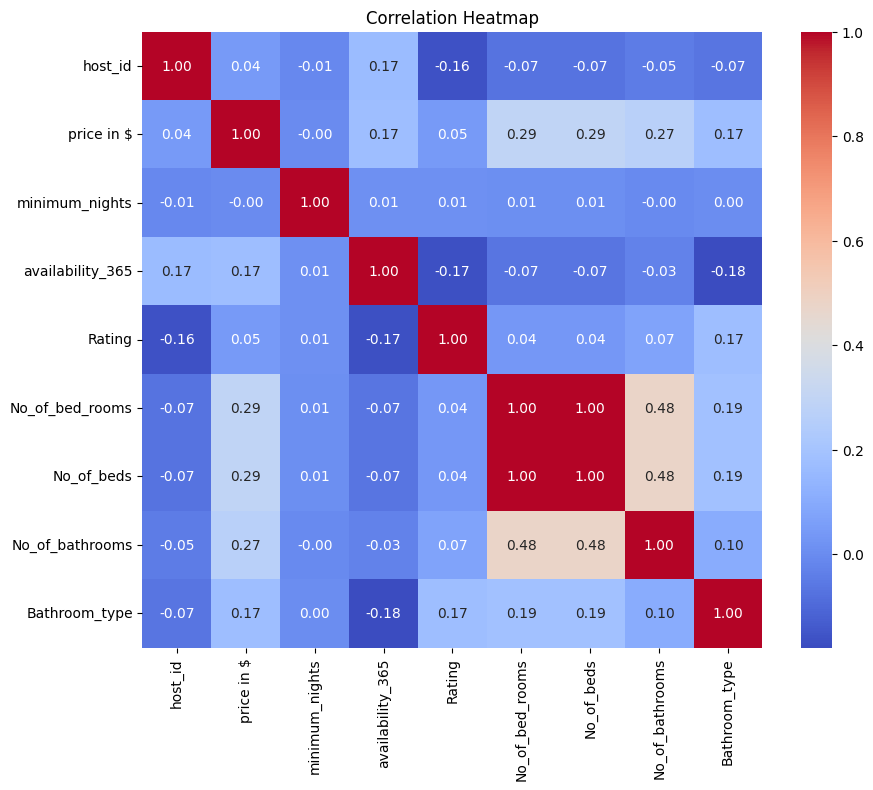

In [ ]:
# 2.2.2 Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 2.3. **Check if is there any multicollinearity.**

In [ ]:
#Import the statsmodels tools needed to perform VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
# 2.3.1 Select all numerical columns *except* host_id.

numerical_columns = df2.select_dtypes(include=['number']).drop(columns=['host_id'])
print(numerical_columns.head())

   price in $  minimum_nights  availability_365  Rating  No_of_bed_rooms  \
0        69.0             3.0               7.0    4.89              1.0   
2       270.0             4.0               2.0    4.86              3.0   
3       200.0             3.0               0.0    4.76              1.0   
4       137.0             3.0               0.0    4.94              1.0   
5       170.0             3.0             157.0    4.77              1.0   

   No_of_beds  No_of_bathrooms  Bathroom_type  
0         1.0              1.5              0  
2         3.0              1.5              1  
3         1.0              1.5              1  
4         1.0              1.5              1  
5         1.0              1.0              1  


In [ ]:
# 2.3.2 Make sure there are no missing (NaN) values
df2.isnull().sum()

host_id             0
neighbourhood       0
room_type           0
price in $          0
minimum_nights      0
availability_365    0
Apartment_type      0
City                0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

In [ ]:
# 2.3.3 Add a constant column for the VIF calculation - VIF (Variance Inflation Factor)
numerical_columns = sm.add_constant(numerical_columns)


In [ ]:
# 2.3.4 Calculate the VIF for each of the columns and display the information.
numerical_columns = numerical_columns.fillna(numerical_columns.mean())

vif_data = pd.DataFrame()
vif_data['Features'] = numerical_columns.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_columns.values, i) for i in range(numerical_columns.shape[1])]
print(vif_data)

           Features         VIF
0             const  534.320122
1        price in $    1.201058
2    minimum_nights    1.000520
3  availability_365    1.114930
4            Rating    1.058086
5   No_of_bed_rooms         inf
6        No_of_beds         inf
7   No_of_bathrooms    1.328305
8     Bathroom_type    1.118485


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### 2.4. **Spot outliers in the dataset.**
(we will not remove outliers for this homework).

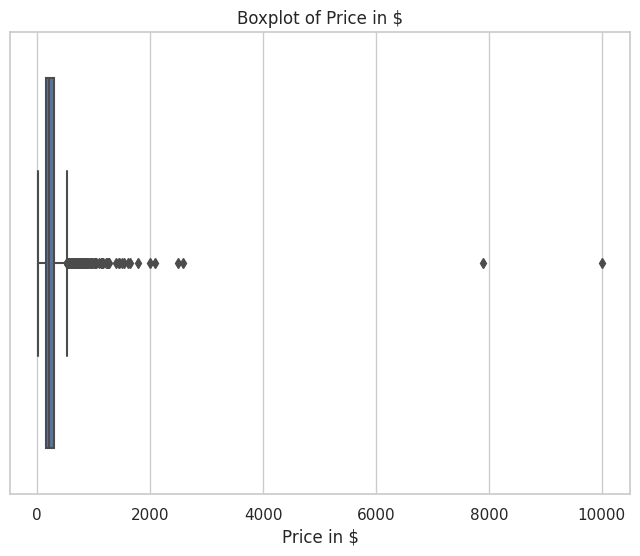

In [ ]:
# 2.4.1. Show boxplot of price in $
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['price in $'])
plt.title('Boxplot of Price in $')
plt.xlabel('Price in $')

plt.show()

In [ ]:
# 2.4.2 Show the maximum price in $
max_price = df['price in $'].max()
print(max_price)

12000.0


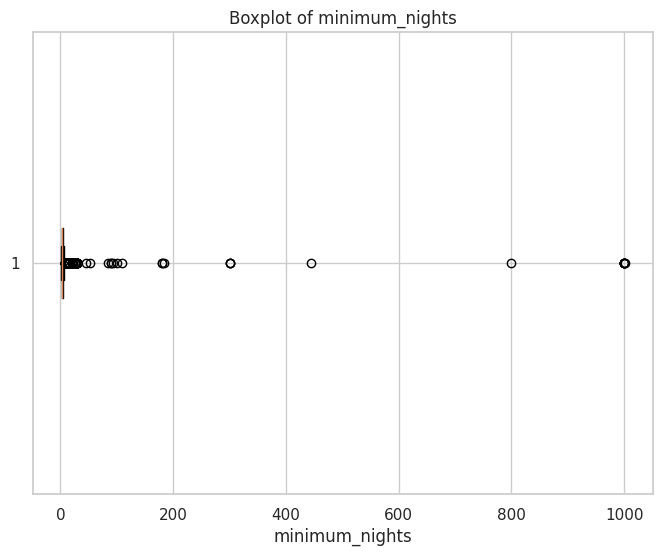

In [ ]:
# 2.4.3 Show a boxplot for minimum_nights
plt.figure(figsize=(8, 6))
plt.boxplot(df2['minimum_nights'], vert=False)
plt.title('Boxplot of minimum_nights')
plt.xlabel('minimum_nights')
plt.show()

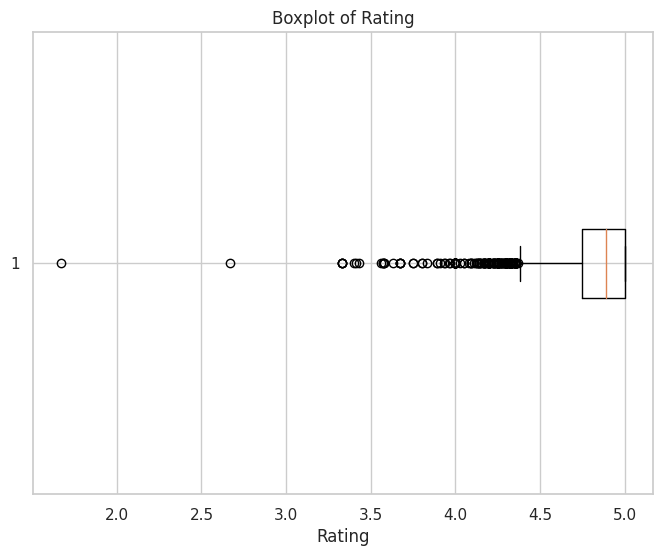

In [ ]:
# 2.4.4 Show a boxplot for Rating
plt.figure(figsize=(8, 6))
plt.boxplot(df2['Rating'], vert=False)
plt.title('Boxplot of Rating')
plt.xlabel('Rating')
plt.show()

In [ ]:
# 2.4.5 Define a function to drop outliers beyond a specific multiplier of the IQR.

def drop_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data_filtered

In [ ]:
# 2.4.6 Find outliers for 'price in $', 'minimum_nights', and 'Rating' using the standard multiplier (1.5)

# Find and drop outliers for 'price in $' using the standard multiplier (1.5)
df3 = drop_outliers_iqr(df2, 'price in $', iqr_multiplier=1.5)

# Find and drop outliers for 'minimum_nights' using the standard multiplier (1.5)
df3 = drop_outliers_iqr(df2, 'minimum_nights', iqr_multiplier=1.5)

# Find and drop outliers for 'Rating' using the standard multiplier (1.5)
df3 = drop_outliers_iqr(df2, 'Rating', iqr_multiplier=1.5)

In [ ]:
# 2.4.7 Display the count of outliers in each selected column

outliers_count_price = len(df3) - len(df2)
outliers_count_minimum_nights = len(df2) - len(df3)
outliers_count_rating = len(df3) - len(df2)  # If you dropped outliers from the original DataFrame

print("Number of outliers in 'price in $':", outliers_count_price)
print("Number of outliers in 'minimum_nights':", outliers_count_minimum_nights)
print("Number of outliers in 'Rating':", outliers_count_rating)

Number of outliers in 'price in $': -41
Number of outliers in 'minimum_nights': 41
Number of outliers in 'Rating': -41


In [ ]:
# 2.4.8 Find outliers for the same column using a multiplier of 3.

# Find and drop outliers for 'price in $' using a multiplier of 3
df_new = drop_outliers_iqr(df2, 'price in $', iqr_multiplier=3)

# Find and drop outliers for 'minimum_nights' using a multiplier of 3
df_new = drop_outliers_iqr(df2, 'minimum_nights', iqr_multiplier=3)

# Find and drop outliers for 'Rating' using a multiplier of 3
df_new = drop_outliers_iqr(df2, 'Rating', iqr_multiplier=3)

In [ ]:
# 2.4.9 Display the new count of outliers in each selected column

outliers_count_price = len(df_new) - len(df2)
outliers_count_minimum_nights = len(df2) - len(df_new)
outliers_count_rating = len(df_new) - len(df2)  # If you dropped outliers from the original DataFrame

print("Number of outliers in 'price in $':", outliers_count_price)
print("Number of outliers in 'minimum_nights':", outliers_count_minimum_nights)
print("Number of outliers in 'Rating':", outliers_count_rating)

Number of outliers in 'price in $': 0
Number of outliers in 'minimum_nights': 0
Number of outliers in 'Rating': 0


### 2.5. **Compute the Average Price for Each Type of Listing.**

In [ ]:
# 2.5.1 Group the data by 'room_type' and calculate the average price for each type

average_price_by_room_type = df.groupby('room_type')['price in $'].mean()
print(average_price_by_room_type)

room_type
Entire home/apt    236.083600
Hotel room         210.565217
Private room       163.672135
Shared room        137.166667
Name: price in $, dtype: float64


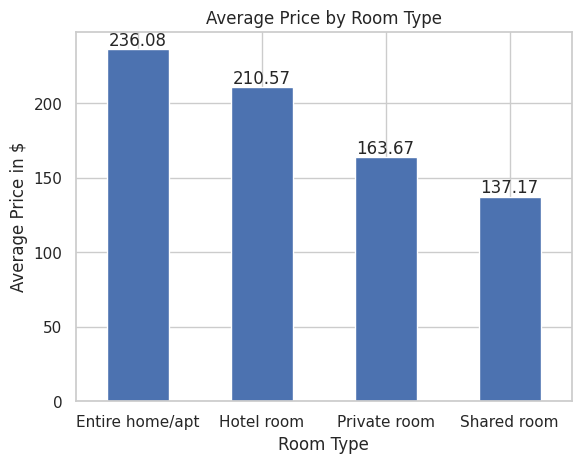

In [ ]:
# 2.5.2 Plot and display  the average price for each room type
ax = average_price_by_room_type.plot(kind='bar', rot=0)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price in $')
for i, v in enumerate(average_price_by_room_type):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

### 2.6. **How Many Listings Are There for Each Unique 'Apartment Type'?**

In [ ]:
# 2.6.1 Count the frequency of each unique 'Apartment_type'
apartment_type_counts = df['Apartment_type'].value_counts()
print(apartment_type_counts)

Rental unit           2398
Condo                 1060
Home                   455
Bed and breakfast      267
Townhouse              247
Houseboat              205
Loft                   159
Boat                   116
Guest suite            104
Boutique hotel          73
Hotel                   70
Serviced apartment      59
Guesthouse              31
Hostel                  31
Place to stay           16
Villa                   16
Aparthotel              12
casa particular         10
Vacation home            9
Tiny home                8
Cabin                    6
Farm stay                5
Earthen home             4
Nature lodge             2
Camper/RV                2
Chalet                   2
Cottage                  1
Tower                    1
Barn                     1
Bungalow                 1
Tent                     1
Name: Apartment_type, dtype: int64


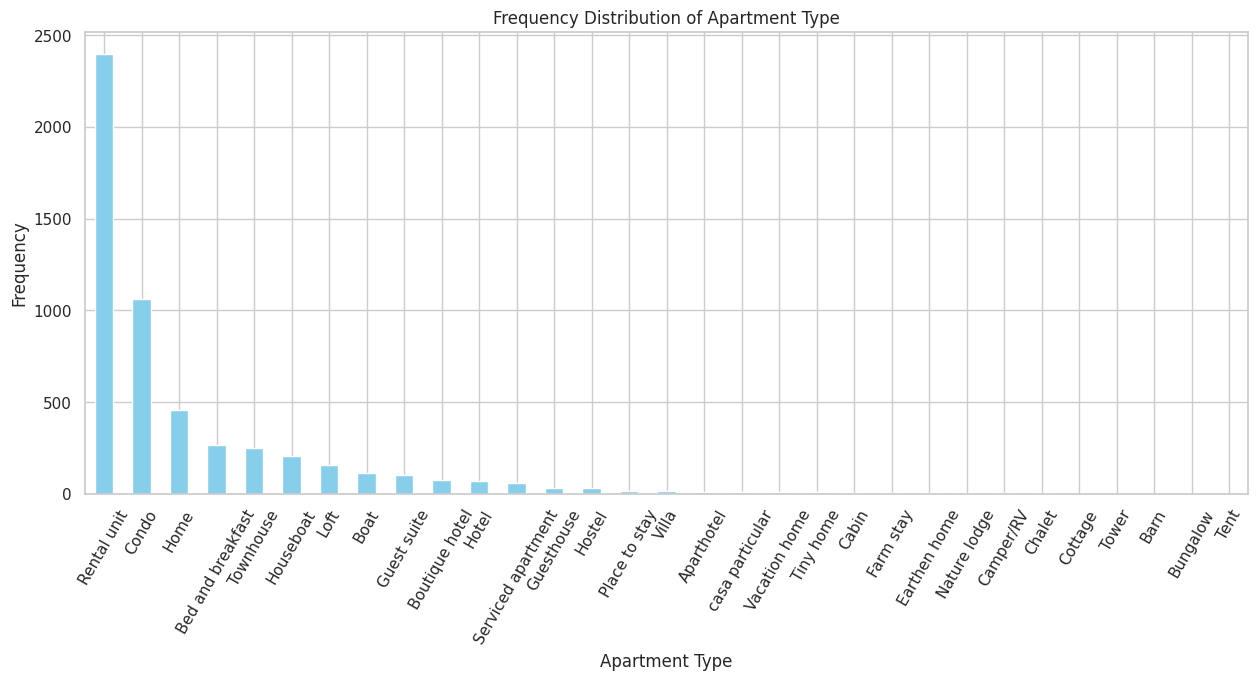

In [ ]:
# 2.6.2 Plot the frequency distribution of 'Apartment_type'

plt.figure(figsize=(15, 6))
apartment_type_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Apartment Type')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# 2.6.3. Display the top 10 most common apartment types
top_10_apartment_types = apartment_type_counts.head(10)

# Displaying the top 10
print(top_10_apartment_types)

Rental unit          2398
Condo                1060
Home                  455
Bed and breakfast     267
Townhouse             247
Houseboat             205
Loft                  159
Boat                  116
Guest suite           104
Boutique hotel         73
Name: Apartment_type, dtype: int64


### 2.7. **Identify the Top 5 Neighbourhoods with the Highest Average Listing Prices.**

In [ ]:
# 2.7.1 Find the top 5 most expensive neighbourhoods based on average price

neighborhood_avg_price = df.groupby('neighbourhood')['price in $'].mean()
top_5_expensive_neighborhoods = neighborhood_avg_price.sort_values(ascending=False).head(5)
print(top_5_expensive_neighborhoods)

neighbourhood
Centrum-Oost               239.295222
De Pijp - Rivierenbuurt    237.624557
Centrum-West               236.546500
Zuid                       234.536873
De Baarsjes - Oud-West     222.526902
Name: price in $, dtype: float64


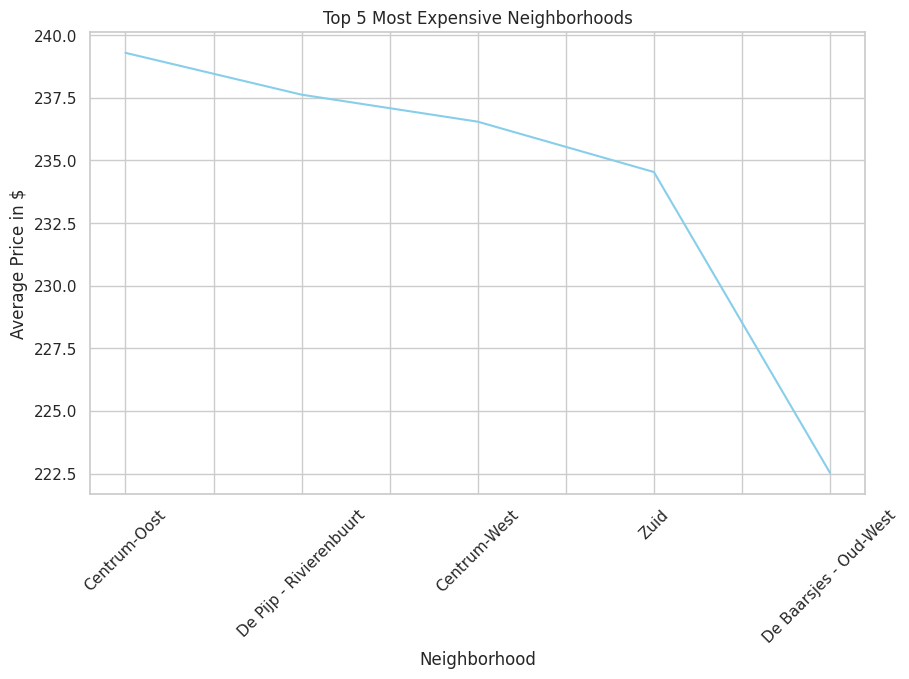

In [ ]:
# 2.7.2. Plot and display the top 5 most expensive neighbourhoods

plt.figure(figsize=(10, 6))
top_5_expensive_neighborhoods.plot(kind='line', color='skyblue')
plt.title('Top 5 Most Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price in $')
plt.xticks(rotation=45)
plt.show()

### 2.8. **Which 'Apartment Types' Are Most and Least Frequently Available?**

In [ ]:
# 2.8.1 Count the frequency of each unique 'Apartment_type' to find the most and least commonly available types
apartment_type_counts = df['Apartment_type'].value_counts()

most_common_type = apartment_type_counts.idxmax()
most_common_count = apartment_type_counts.max()

least_common_type = apartment_type_counts.idxmin()
least_common_count = apartment_type_counts.min()

# Printung most common adn least common
print(f"Most Commonly Available Apartment Type: {most_common_type} ({most_common_count} listings)")
print(f"Least Commonly Available Apartment Type: {least_common_type} ({least_common_count} listings)")

Most Commonly Available Apartment Type: Rental unit (2398 listings)
Least Commonly Available Apartment Type: Cottage (1 listings)


In [ ]:
# 2.8.2 Find the top 5 most commonly available and the least commonly available apartment types

# 5 most commonly available types
top_5_most_common = apartment_type_counts.head(5)

least_common_count = apartment_type_counts.min()
least_common_types = apartment_type_counts[apartment_type_counts == least_common_count]

# Print
print("Top 5 Most Commonly Available Apartment Types:")
print(top_5_most_common)

print("\nLeast Commonly Available Apartment Types:")
print(least_common_types)

Top 5 Most Commonly Available Apartment Types:
Rental unit          2398
Condo                1060
Home                  455
Bed and breakfast     267
Townhouse             247
Name: Apartment_type, dtype: int64

Least Commonly Available Apartment Types:
Cottage     1
Tower       1
Barn        1
Bungalow    1
Tent        1
Name: Apartment_type, dtype: int64


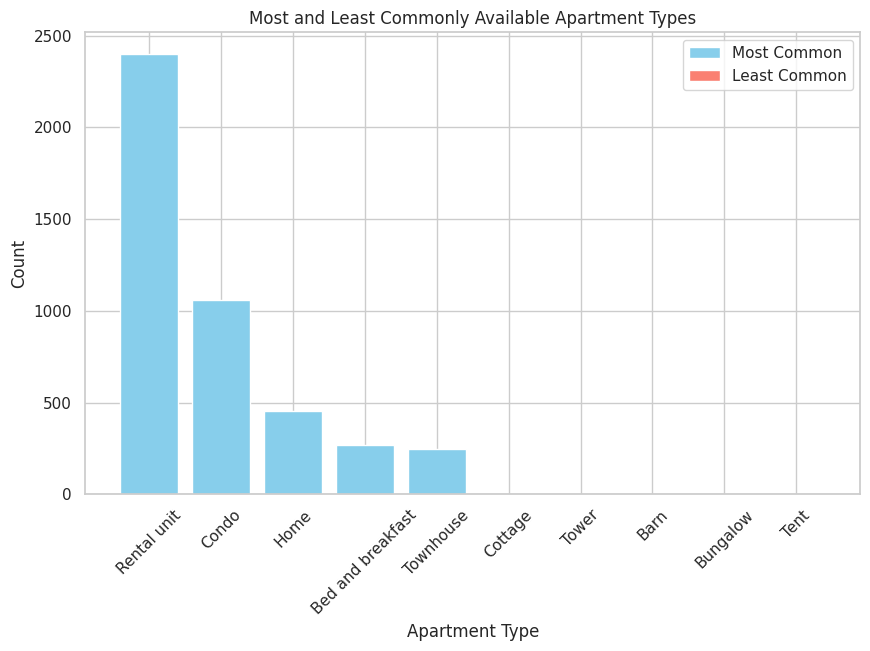

In [ ]:
# 2.8.3 Plot and display the most and least commonly available apartment types
least_common_count = apartment_type_counts.min()
least_common_types = apartment_type_counts[apartment_type_counts == least_common_count]
plt.figure(figsize=(10, 6))
plt.bar(top_5_most_common.index, top_5_most_common.values, color='skyblue', label='Most Common')
plt.bar(least_common_types.index, least_common_types.values, color='salmon', label='Least Common')
plt.xlabel('Apartment Type')
plt.ylabel('Count')
plt.title('Most and Least Commonly Available Apartment Types')
plt.legend()
plt.xticks(rotation=45)

plt.show()